# LABORATORIO 3 - Práctica 3: Clasificador de imagenes
---
<img src="ufv.png" width="100px" height="100px"></img> 
### Integrantes: 
* Julián Prieto Velasco   
* Guillermo Ramírez Cárdenas
* Pedro Paniagua Falo     
* Javier Muñoz Rojas

---

## **Índice**
1. [Introducción](#id0)
2. [Apartado 1](#id1)
3. [Apartado 2](#id2)



In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
# Cargamos el dataset de load digits
digits = datasets.load_digits()

<div id='id0'>

## *Introducción*
El etiquetado de imágenes es una tarea ardua. Es por ello y también debido a sus aplicaciones prácticas que los  científicos  llevan  un  tiempo  intentando  mejorar  los  métodos  para  clasificarlas  automáticamente.  En  la oficina de correos de Pozuelo de Alarcón quieren poner en práctica un modelo que clasifique las cartas según el código postal escrito en ellas. Para ello vamos a crear un clasificador que leyendo un número escrito a mano pueda saber cuál es. Dicho clasificador funcionará mediante un set de  entrenamiento donde  se  buscará un plano   que   divida   las   diferentes   clases   dispuesta   en   un   espacio   n-dimensional   dependiendo   de   sus características. 
Para ello usaremos el dataset “load_digits” que se encuentra en scikit-learn. Elige el clasificador que más se adapte  de  entre  los  vistos  en  clase  y  usa  scikit-learn  junto  con  las  librerías  que  necesites  para  resolver  las siguientes cuestiones.

<div id='id1'>

### Apartado 1 
Crea un clasificador que permita saber quénúmero es a partir de una imagen de este. Realiza al menos dos configuraciones y dibuja una tabla donde se muestre la precisión con la que clasifican.

Para resolver este problema, podemos utilizar el algoritmo de clasificación de SVM (Support Vector Machine), que se ha visto en clase. SVM es un algoritmo de aprendizaje supervisado que se utiliza para clasificar conjuntos de datos. En particular, es útil cuando tenemos dos o más clases que están bien separadas en un espacio n-dimensional.

Se ha decidido utilizar el 30% de los datos para poder realizar un test despues del entrenamiento para obtener la precision del clasificador y así poder evaluarlo. 
Las dos configuraciones elegidas han sido con un gamma de 0.001 y de 0.0001 ya que con varias pruebas se ha observado una clasificación óptima para los dos casos y así poder compararlos aunque sean bastante positivos sus resultados.

Para realizar el segundo apartado se han descartado del entrenamiento ciertos datos de dataset y así el clasificador no los verá hasta después del entrenamiento para evaluar su efectividad.

Precisión del clasificador con C=1, gamma=0.001:  0.9925233644859813
Precisión del clasificador con C=100, gamma=0.0001:  0.983177570093458


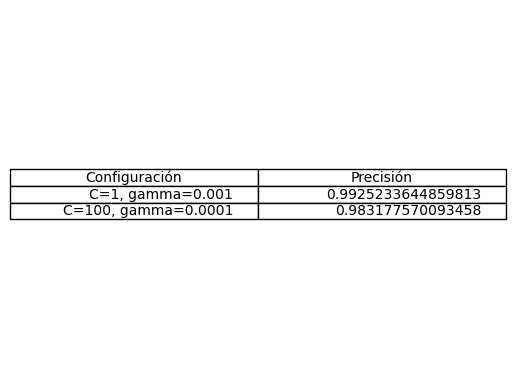

In [5]:
# Dividimos los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=0)

# Dejamos 5 imágenes en un array separado para usar después
X_holdout = X_test[:5]
y_holdout = y_test[:5]

# Eliminamos las 5 imágenes del conjunto de prueba
X_test = X_test[5:]
y_test = y_test[5:]

# Creamos un clasificador SVM con kernel rbf
classifier = svm.SVC(kernel='rbf', C=1, gamma=0.001)

# Entrenamos el clasificador con el conjunto de entrenamiento
classifier.fit(X_train, y_train)

# Evaluamos la precisión del clasificador con el conjunto de prueba
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precisión del clasificador con C=1, gamma=0.001: ", accuracy)

# Creamos otro clasificador con diferentes valores de C y gamma
classifier2 = svm.SVC(kernel='rbf', C=100, gamma=0.0001)

# Entrenamos el nuevo clasificador con el conjunto de entrenamiento
classifier2.fit(X_train, y_train)

# Evaluamos la precisión del nuevo clasificador con el conjunto de prueba
y_pred2 = classifier2.predict(X_test)
accuracy2 = metrics.accuracy_score(y_test, y_pred2)

print("Precisión del clasificador con C=100, gamma=0.0001: ", accuracy2)

# Mostramos una tabla con las precisiones obtenidas por cada clasificador
table_data = [['C=1, gamma=0.001', accuracy], ['C=100, gamma=0.0001', accuracy2]]
column_names = ['Configuración', 'Precisión']
plt.table(cellText=table_data, colLabels=column_names, loc='center')
plt.axis('off')
plt.show()




<div id='id2'>

### Apartado 2
Elige 5 números que no hayas usado ni para entrenar el modelo, ni para evaluarlo y clasifícalas. Usa para ello el modelo que  mejor clasifique  de  los del punto anterior. Índica con que  error ha funcionado el clasificador

El mejor clasificador ha resultado ser el primero, con lo que lo usaremos para clasificar las 5 imágenes que el modelo no ha visto ni en el entrenamiento ni en la validación.

In [8]:
# Clasificamos los números no usados usando el clasificador 1
y_pred_unused = classifier.predict(X_holdout)

# Evaluamos la precisión del clasificador en los números no usados
accuracy_unused = metrics.accuracy_score(y_holdout, y_pred_unused)

print("Precisión del clasificador en los números no usados: ", accuracy_unused*100, "%")
print("Error del clasificador en los números no usados: ", (1-accuracy_unused)*100, "%")

Precisión del clasificador en los números no usados:  100.0 %
Error del clasificador en los números no usados:  0.0 %


Podemos observar una precisión del 100% y un error del 0%. Esto confirma que el modelo clasifica correctamente y que es bastante preciso.